<h1><center>COMS7047A A1: Linear Regression</center></h1> 

<img src="./wits_logo.png" alt="Wits_Logo" style="width: 400px;"/>

***
<h4><center> Samantha Ball  &nbsp;   1603701   &nbsp;  March 2021</center></h4>

In [514]:
#----INSTALL LIBRARIES----#
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.model_selection import train_test_split 
%matplotlib inline

## Data Import
The chosen dataset involves factors affecting medical insurance costs where costs are predicted based on variables such as *age, sex, bmi, children, smoker, region* and *charges*. The dataset was obtained from [Kaggle](https://www.kaggle.com/mirichoi0218/insurance). 

In [515]:
#----IMPORT DATA----#
data_path = "./insurance.csv" # data given in CSV format
df = pd.read_csv(data_path) #read in data

pd.set_option('display.max_columns', None) #show all columns
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Preparation

In [516]:
#----IMPUTE MISSING VALUES----#

#Find number of missing data entries in each column
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

age
False    1338
Name: age, dtype: int64

sex
False    1338
Name: sex, dtype: int64

bmi
False    1338
Name: bmi, dtype: int64

children
False    1338
Name: children, dtype: int64

smoker
False    1338
Name: smoker, dtype: int64

region
False    1338
Name: region, dtype: int64

charges
False    1338
Name: charges, dtype: int64



No missing values found therefore no imputation needed.

## Data Exploration

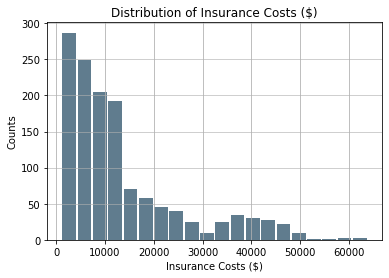

In [517]:
#----DATA EXPLORATION----#

#Visualise target variable: insurance costs (charges)
df["charges"].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Distribution of Insurance Costs ($)')
plt.ylabel('Counts')
plt.xlabel('Insurance Costs ($)')
plt.grid(axis='y', alpha=0.75)

### Continuous Variables

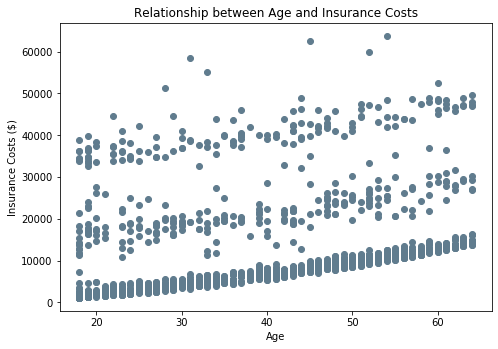

In [518]:
#Relationship between charges and age
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df["age"], df["charges"], color='#607c8e')
ax.set_xlabel('Age')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between Age and Insurance Costs')
plt.show()

A linear relationship is observed between the predictor variable *age* and the target variable *insurance costs*.

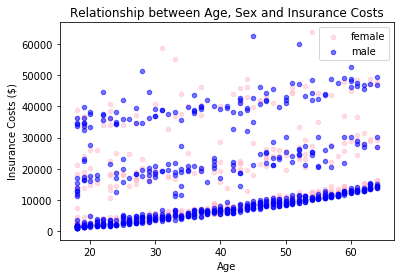

In [519]:
#Relationship between charges and age, showing distribution according to male and female
fig, ax = plt.subplots()
colors = {'female':'pink', 'male':'blue'}

grouped = df.groupby('sex')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='age', y='charges', label=key, color=colors[key], alpha=0.55)

ax.set_xlabel('Age')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between Age, Sex and Insurance Costs')
plt.show()

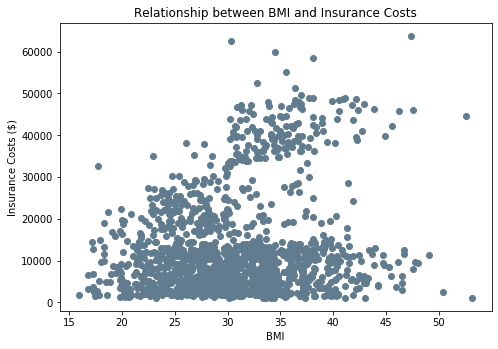

In [520]:
#Relationship between charges and Body Mass Index (BMI)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df["bmi"], df["charges"], color='#607c8e')
ax.set_xlabel('BMI')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between BMI and Insurance Costs')
plt.show()

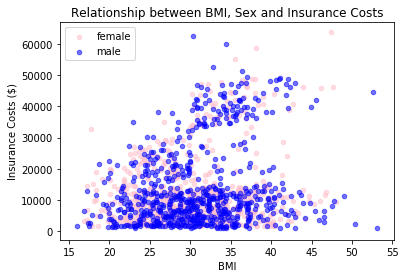

In [521]:
#Relationship between charges and BMI, showing distribution according to male and female
fig, ax = plt.subplots()
colors = {'female':'pink', 'male':'blue'}

grouped = df.groupby('sex')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='bmi', y='charges', label=key, color=colors[key], alpha=0.55)

ax.set_xlabel('BMI')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between BMI, Sex and Insurance Costs')
plt.show()

### Categorical Variables

Text(0.5, 1.0, 'Relationship between No. of Dependents and Insurance Costs')

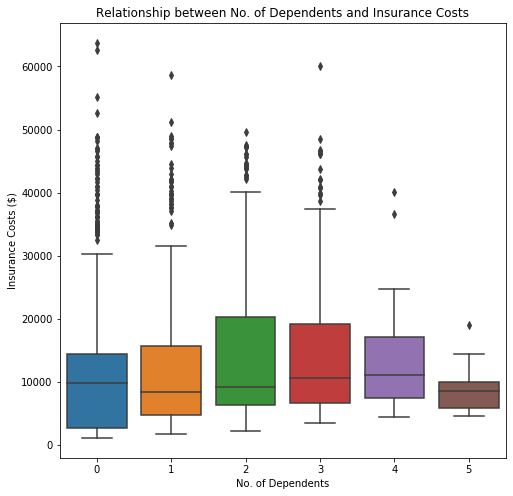

In [522]:
#Relationship between charges and children 
f, ax = plt.subplots(figsize= (8, 8))
sns.boxplot(x="children", y="charges", data=df)
ax.set_xlabel('No. of Dependents')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between No. of Dependents and Insurance Costs')

Text(0.5, 1.0, 'Relationship between Sex and Insurance Costs')

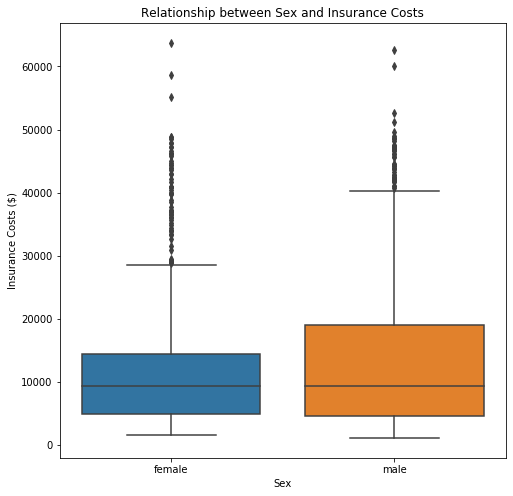

In [523]:
#Relationship between charges and sex 
f, ax = plt.subplots(figsize= (8, 8))
sns.boxplot(x="sex", y="charges", data=df)
ax.set_xlabel('Sex')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between Sex and Insurance Costs')

Text(0.5, 1.0, 'Relationship between Region and Insurance Costs')

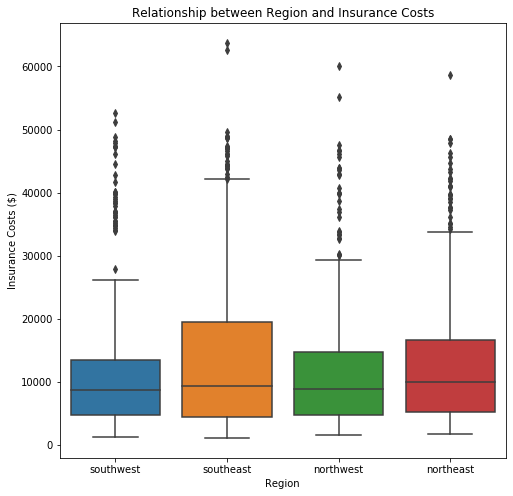

In [524]:
#Relationship between charges and region
f, ax = plt.subplots(figsize= (8, 8))
sns.boxplot(x="region", y="charges", data=df)
ax.set_xlabel('Region')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between Region and Insurance Costs')

Text(0.5, 1.0, 'Relationship between Smoking and Insurance Costs')

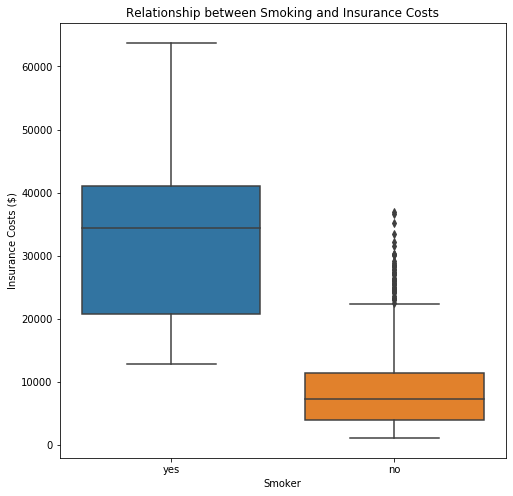

In [525]:
#Relationship between charges and smoking status
f, ax = plt.subplots(figsize= (8, 8))
sns.boxplot(x="smoker", y="charges", data=df)
ax.set_xlabel('Smoker')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between Smoking and Insurance Costs')

A clear correlation between smoking and increased medical costs can be observed from the contrast in distributions.

### Data Transformation

Categorical variables require encoding to be input to the linear regression model. We employ categorical encoding for the *region* variable which has four classes and one-hot encoding for the binary variables *sex* and *smoker*.

In [526]:
# Categorical encoding
df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes

In [527]:
# One Hot Encoding
dummy_variable_1=pd.get_dummies(df["sex"])
df = pd.concat([df, dummy_variable_1], axis=1)
dummy_variable_2=pd.get_dummies(df["smoker"])
df = pd.concat([df, dummy_variable_2], axis=1)

In [528]:
df.head()

,age,sex,bmi,children,smoker,region,charges,female,male,no,yes
0,19,female,27.900,0,yes,3,16884.92400,1,0,0,1
1,18,male,33.770,1,no,2,1725.55230,0,1,1,0
2,28,male,33.000,3,no,2,4449.46200,0,1,1,0
3,33,male,22.705,0,no,1,21984.47061,0,1,1,0
4,32,male,28.880,0,no,1,3866.85520,0,1,1,0


In [529]:
# Correlation
df["charges"].corr(df["yes"]) # v. high correlation with smoking 'yes'

0.7872514304984772

In [530]:
df["charges"].corr(df["age"]) # correlation with age

0.29900819333064765

In [531]:
df["charges"].corr(df["bmi"]) # correlation with bmi

0.19834096883362892

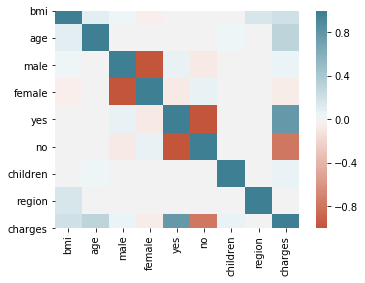

In [532]:
# Plot correlation of predictor variables with target variable charges
features = df[["bmi", "age", "male", "female", "yes", "no", "children", "region", "charges"]]
feat_corr = features.corr()
ax = sns.heatmap(
    feat_corr , 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

We note that the pairs 'male' and 'female', and 'yes' and 'no' encode redundant information and therfore we choose one of each pair to form our final chosen features.

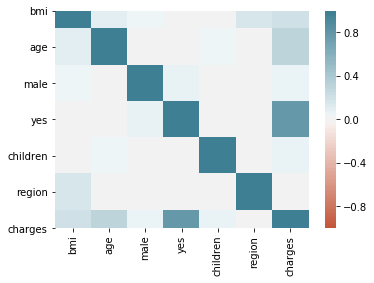

In [533]:
reduced_features = df[["bmi", "age", "male", "yes", "children", "region", "charges"]]
feat_corr = reduced_features.corr()
ax = sns.heatmap(
    feat_corr , 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

We observe that being a smoker has the highest correlation with increased medical insurance charges. This is followed by age, bmi and then very low correlation with being male and number of children. No correlation is observed with region.

## 1. Implementation of Basic Linear Regression

### Linear Regression Model

We first build a basic linear regression model. Linear regression can be written as the following equation:

$$
\begin{align}
y &= h_{\theta}(x) = \sum_{j=0}^d \theta_{j} x_j  
\end{align}
$$

where $d$ represents the number of input features.
It should be noted that we assume $x_0 = 1$ in order to provide a bias or intercept term. Therefore 

$$
\begin{align}
y = h_{\theta}(x) &= \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_d x_d \\
&= \theta_0 + \sum_{j=1}^d \theta_{j} x_j 
\end{align}
$$
   
   
We implement this form of the equation in the method *linear_pred* below.   

In [534]:
#---BASIC LINEAR MODEL---#


"""
Predicts output y based on input features x according to a linear hypothesis function.

Parameters:
    Input features x
    Parameter/weight matrix theta
    Bias term theta_0

Returns:
    Value predicted by the hypothesis function for the given input x.

"""
def linear_pred(x, theta, theta_0): # takes in input features, parameters and bias term
    y = np.dot(x, theta) + theta_0 # implements linear regression equation above
    return y # returns prediction


We then define the cost function for 'least squares' linear regression, given by the equation:

$$
\begin{align}
J(\theta) &= \frac{1}{2n} \sum_{i=1}^n (h_{\theta}(x^{(i)}) - y^{(i)})^2 
\end{align}
$$

where $n$ is the number of training examples. This cost function represents the sum of squared errors between the predicted and true values of $y$. We implement the cost function in the method *cost* below.

In [535]:
#---COST FUNCTION---#

def cost(pred, true): # takes in predicted and true values of output y
    cost = (1/2)*np.mean((true - pred)**2) # calculates cost as the sum of squared errors
    return cost # return cost for use in gradient descent
    

In order to fit our linear regression model to the given data, we perform gradient descent.
Our goal during gradient descent is to minimize the cost $J(\theta)$ by finding the optimal values of the parameters $\theta$. We implement the following procedure:

- Choose initial values for parameters $\theta$
- Until we reach convergence:
    * Update the value of $\theta$ by moving in the negative direction of the gradient $\frac{\partial J(\theta)}{\partial \theta_{j}}$

Through this process of gradient descent, we reach the global minima and therefore minimize cost $J(\theta)$.

Therefore, before implementing gradient descent, we need to first calculate the gradient of the cost function with respect to the parameters $\theta$. This gradient is calculated as follows:

$$
\begin{align}
\frac{\partial J(\theta)}{\partial \theta_{j}} &= \frac{1}{n} \sum_{i=1}^n (h_{\theta}(x^{(i)}) - y^{(i)})(x_j^{(i)}) 
\end{align}
$$

We also require the bias term $\theta_0$ to be updated. We use the same formula above but with the input $x_0 = 1$ as follows:

$$
\begin{align}
\frac{\partial J(\theta)}{\partial \theta_{j}} &= \frac{1}{n} \sum_{i=1}^n (h_{\theta}(x^{(i)}) - y^{(i)})(1) 
\end{align}
$$

In [536]:
#---GRADIENT OF THE COST FUNCTION---#

# calculate gradient of cost function wrt parameters theta_1 to theta_d
def gradient(pred, true, x):
    n = pred.shape[0] # number of training examples
    grad = (np.dot(np.transpose(x),(pred-true))) / n # calculate gradient w.r.t parameters theta
    return grad # return the gradient 


# calculate gradient of cost function wrt bias term theta_0
def theta_0_gradient(pred, true, x):
    n = pred.shape[0] # number of training examples
    grad = np.sum(pred-true) / n # calculate gradient w.r.t bias term
    return grad # return the gradient

In order to provide a stopping condition, two differing methods were considered to best perform the experimentation.

1. Fixed number of iterations
2. The parameters $\theta$ cease to alter significantly such that the change in $\theta$ values falls below a certain threshold $\epsilon$

In order to implement the second condition, the Euclidean norm between the previous and updated $\theta$ values was calculated according to:

$$
\begin{align}
|| \theta_{new} - \theta_{old} ||_2 &= \sqrt{\sum_{i=0}^d (\theta_{new_i} - \theta_{old_i} )^2}
\end{align}
$$

In [537]:
#---STOPPING CONDITIONS---#

def euclid(theta, theta_prev):
    return np.linalg.norm(theta - theta_prev) # returns euclidean norm representing change in theta values

### Visualisation of Training Process

In order to provide insight and understanding into the training process, several graphs were plotted.

*1. Test and Training Loss* 

The train and test curves were plotted for each iteration of the gradient descent algorithm. This provides insight into how the cost decreases over time during the training process.

*2. Progression of the Fitted Regression Line during Training*

The fitted regression line was plotted against the original data to show the progression of the line being fit to the data as the parameter values are updated. The regression line is shown for several iterations of theta values until the final fitted line.

*3. Cost Function*

The cost function was plotted as a function of the parameter $\theta_1$. The corresponding $\theta_1$ values at several stages of the gradient descent algorithm is then plotted to show the inner workings of the algorithm. It should be noted that the bias value is assumed to be the final fitted value in order for an intuitive representation of the cost function at each stage.


*4. Final Fitted Regression Line*

Lastly, the final fitted regression line is plotted against the original data to show the results of the linear regression process.


It should be noted that graphs 2-4 could only be plotted for single variable regression since there are no equivalent visualisations in higher dimensions (such as five dimensions). 

In [538]:
#---VISUALISATION---#

# Evaluate model on test data for use in test loss visualisation
def evaluate(x_test, y_test, theta, theta_0):
    y_pred = linear_pred(x_test, theta, theta_0) # predict using test data
    loss = cost(y_pred, y_test)
    return loss

# Plot training and test loss as a function of iterations
def plot_test_train_loss(losses, test_losses):
    plt.plot(losses, label = "Training Loss", color = 'm')
    plt.ylabel('Loss')
    plt.xlabel('Iterations')
    plt.plot(test_losses, label = "Test Loss", color = 'c')
    plt.legend()
    plt.title("Training and Test Error")
    plt.show()
    

# Plot the fitted regression line as the parameter values update    
def plot_multiple_hypotheses(x, y, thetas, theta_0s):
    colors = ['b', 'g', 'm', 'c', 'orange']
    plt.scatter(x, y, marker= 'o', s=40, color='lightsteelblue') # scatter plot of original data
    plt.ylabel('Medical Insurance Costs ($)')
    plt.xlabel('Predictor Variable')
    plt.title("Progression of Fitted Line During Training")
    i = 0
    j = 0
    while (i < len(thetas)):
        plt.plot(x, linear_pred(x, thetas[i], theta_0s[i]), color=colors[j], lw=2) # fitted regression line
        i+= int(np.floor((len(thetas)/20))) # sample thetas in regular intervals for clear visualisation   
        j+=1
        if (j == len(colors)):
            j = 0
    plt.show()


# Plot cost function and show progression of parameter values towards the global min
def plot_cost_function(x, y, theta, theta_0, thetas, theta_0s):
    colors = ['b', 'g', 'm', 'c', 'orange']
    theta_range = np.linspace(0, thetas[-1][0]*2, 500) # create a range of parameter values
    costs = []
    t = 0
    while (t < len(theta_range)):
        costs.append(cost(linear_pred(x, theta_range[t][0], theta_0), y)) # calculate cost function
        t += 1
    plt.plot(theta_range, costs, color='lightsteelblue') # plot cost function
    plt.ylabel('Cost')
    plt.xlabel('Theta_1')
    plt.title("Movement along the Cost Function during Gradient Descent")
    i = 0
    j = 0
    while (i < len(thetas)):
        plt.scatter(thetas[i], cost(linear_pred(x, thetas[i], theta_0), y), color=colors[j], lw=2) # plot theta value
        i+= int(np.floor((len(thetas)/20))) # sample thetas in regular intervals for clear visualisation 
        j+=1
        if (j == len(colors)):
            j = 0
    plt.show()
        

    
# Plot final fitted regression line against original data
def plot_single_hypothesis(x, y, theta, theta_0, variable_name):
    plt.scatter(x, y, marker= 'o', s=40, color='lightsteelblue')
    plt.plot(x, linear_pred(x, theta, theta_0), color='c', lw=2, label = "Theta_1 = {0:.2f}, Theta_0 = {1:.2f}".format(theta[0][0], theta_0))
    plt.ylabel('Medical Insurance Costs ($)')
    plt.xlabel(variable_name)
    plt.legend(loc='upper right')
    plt.title("Fitted Regression Line")
    plt.show()
    

# Visualisations for single variable regression
def visualisation(x, y, losses, test_losses, thetas, theta_0s):
    plot_multiple_hypotheses(x, y, thetas, theta_0s)
    plot_cost_function(x, y, thetas[-1], theta_0s[-1], thetas, theta_0s)
    

### Gradient Descent

Batch gradient descent was chosen to be implemented since the the size of the training dataset was relatively small (< 1000 training samples). Therefore, for each iteration, prediction is performed for *all* the training examples before the parameters are updated. This provides a smoother descent to the global minima. 

Stochastic gradient descent is implemented at the end of the notebook for comparison.

In [539]:
#---BATCH GRADIENT DESCENT---#

def batch_grad_desc(x, y,  x_train, x_test, y_train, y_test, lr, epsilon, single):
    
    # init all variables
    theta = np.zeros((len(x_train[0]), 1)) # initialise weight matrix with shape (d x 1)
    theta_0 = 0 # initialise bias term
    MAX_LOOPS = 100 # for use if maximum iterations is used as stopping condition
    loops = 0 # loop counter
    theta_prev = np.ones((len(x_train[0]), 1))  # ensures while loop runs at least once
    
    losses = [] # track training losses
    test_losses = [] # track test losses
    thetas = [] # track parameter values
    theta_0s = [] # track bias values

    
    # perform gradient descent until convergence
    # while(loops < MAX_LOOPS): # alternative stopping condition
    while(euclid(theta, theta_prev) > epsilon): # stop when change in theta values is no longer signficant
        pred = linear_pred(x_train, theta, theta_0) # predict for all training samples
        loss = cost(pred, y_train) # calculate cost based on current theta values
        losses.append(loss)
        theta_prev = theta # store previous theta for use in stopping condition
        thetas.append(theta) # store theta values for visualisation
        theta_0s.append(theta_0) # store bias values for visualisation
        grad = gradient(pred, y_train, x_train) # calculate gradient wrt theta
        grad_theta_0 = theta_0_gradient(pred, y_train, x_train) # calculate gradient wrt theta_0
        theta = theta - (lr*grad) # update parameters
        theta_0 = theta_0 - (lr*grad_theta_0) # update bias
        test_loss = evaluate(x_test, y_test, theta, theta_0) 
        test_losses.append(test_loss)
        loops += 1
        
    # visualise train and test error and gradient descent process
    plot_test_train_loss(losses, test_losses)
    # if single variable regression, plot additional visualisations
    if(single==1):
        visualisation(x, y, losses, test_losses, thetas, theta_0s)
    return [theta, theta_0] # return fitted parameter values and history 

In order to provide a baseline comparator to benchmark the outcome of the gradient descent algorithm, the closed form solution for the parameters $\theta$ was calculated as follows:

$$
\begin{align}
\theta = (X^T X)^{-1} X^Ty
\end{align}
$$

In [540]:
#---CLOSED FORM SOLUTION---#

# calculate closed form solution
def normal_eq(x_train, y_train):
    X0 = np.ones((x_train.shape[0],1)) # add x_0 = 1
    Xnew = np.hstack((X0, x_train)) # add column for bias
    theta_all = np.dot(np.linalg.inv(np.dot(np.transpose(Xnew), Xnew)), np.dot(np.transpose(Xnew), y_train)) #when is it a dot product and when not
    return theta_all # return parameter values

All the above components are assembled into the following *custom_linear_regr* method which performs batch gradient descent for the given data.

In [541]:
#---CUSTOM LINEAR REGRESSION---#

def custom_linear_regr(x, y, lr, epsilon, single):
    
     # split data into train and test sets 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

    print("Normal Equation")
    print("Intercept : {}".format(normal_eq(x_train, y_train)[0]))
    print("Coefficients : {}".format(normal_eq(x_train, y_train)[1:]))
    
    # perform batch gradient descent
    print("\nTraining model...")
    theta, theta_0 = batch_grad_desc(x, y, x_train, x_test, y_train, y_test, lr, epsilon, single) # fit model using training data
    
    print("\nCalculated Parameter Values:\n")
    print("Intercept : {}".format(theta_0))
    print("Coefficients : {}".format(theta))

    print("\nPredict using test data...")
    y_pred = linear_pred(x_test, theta, theta_0) # predict on test data

    score = r2_score(y_test , y_pred)
    print("R2 Score : {}".format(score))
    print("Model Accuracy: {}%".format(score * 100))


    print("Cost : {}".format(cost(y_pred, y_test)))
    print("MSE : {}".format(mean_squared_error(y_test, y_pred)))
    print("\n")
        
    
    return theta, theta_0
    

### Single Variable Linear Regression

We now apply our custom linear regression algorithm to the medical insurance data. Both single and multiple variable regression will be investigated.

#### Body Mass Index (BMI) as a Predictor for Medical Insurance Costs

Normal Equation
Intercept : [2725.6360132]
Coefficients : [[339.52829171]]

Training model...


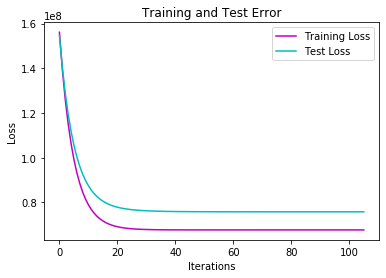

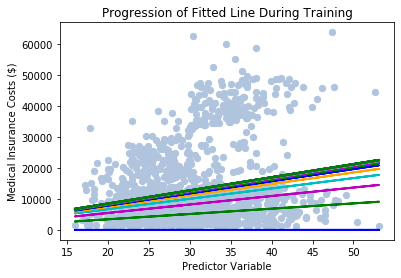

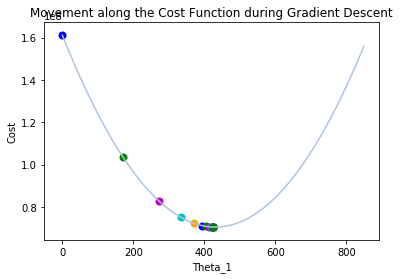


Calculated Parameter Values:

Intercept : 14.422965026352676
Coefficients : [[424.48083176]]

Predict using test data...
R2 Score : 0.05416601356648565
Model Accuracy: 5.416601356648565%
Cost : 75825241.00584236
MSE : 151650482.01168472




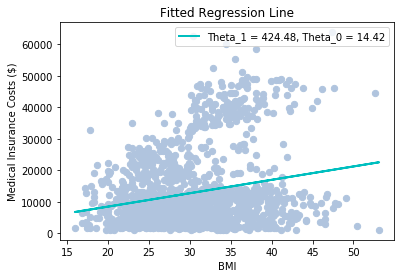

In [542]:
# Single variable linear regression using BMI as a predictor
learning_rate = 0.0001
epsilon = 0.0005
single =  1 # indicates single variable regression
x = df[["bmi"]].values
y = df[["charges"]].values
theta, theta_0 = custom_linear_regr(x, y,  learning_rate, epsilon, single) # perform gradient descent
variable_name = "BMI"
plot_single_hypothesis(x, y, theta, theta_0, variable_name) # plot final fitted line

We observe that our training and test loss decrease as expected. The cost function indicates the movement of the parameter value $\theta_1$ towards the global minimum. While the $\theta_1$ value is close to that of the normal form solution, the intercept value $\theta_0$ differs considerably.

#### Age as a Predictor for Medical Insurance Costs

Normal Equation
Intercept : [3337.27583294]
Coefficients : [[247.90264149]]

Training model...


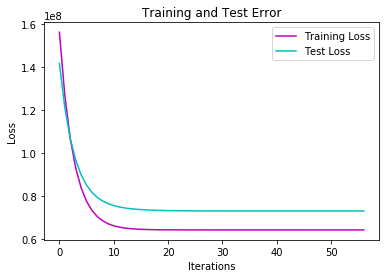

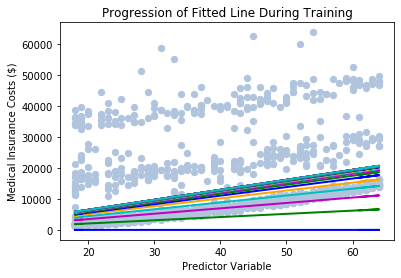

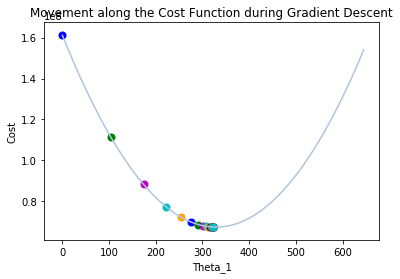


Calculated Parameter Values:

Intercept : 9.365858875673563
Coefficients : [[322.71242987]]

Predict using test data...
R2 Score : 0.08735768998500149
Model Accuracy: 8.735768998500149%
Cost : 73164343.95633799
MSE : 146328687.91267598




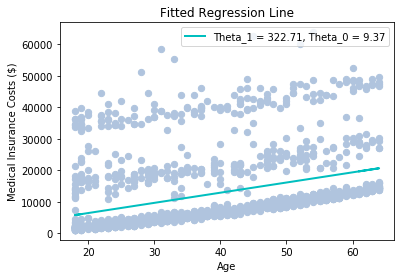

In [543]:
# Single variable linear regression using age as a predictor
learning_rate = 0.0001
epsilon = 0.0005
single = 1
x = df[["age"]].values
y = df[["charges"]].values
variable_name = "Age"
theta, theta_0 = custom_linear_regr(x, y,  learning_rate, epsilon, single)
plot_single_hypothesis(x, y, theta, theta_0, variable_name)

#### Smoking as a Predictor for Medical Insurance Costs

Normal Equation
Intercept : [8613.47408583]
Coefficients : [[22675.08827665]]

Training model...


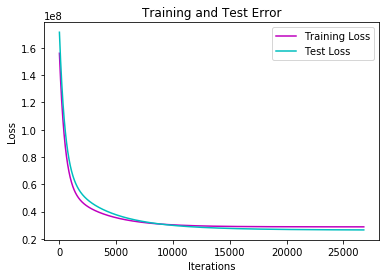

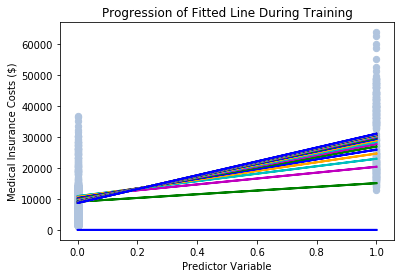

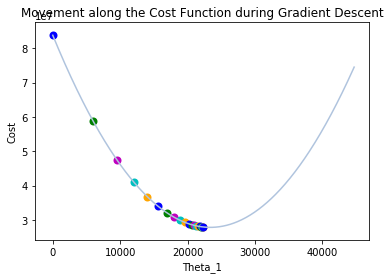


Calculated Parameter Values:

Intercept : 8690.625996913639
Coefficients : [[22347.44631182]]

Predict using test data...
R2 Score : 0.6695701325093246
Model Accuracy: 66.95701325093246%
Cost : 26489769.555103853
MSE : 52979539.11020771




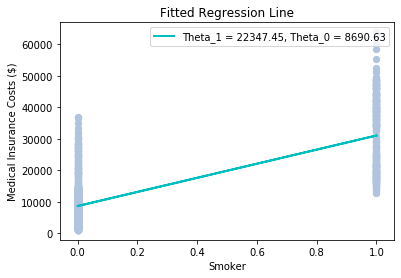

In [544]:
# Single variable linear regression using smoking as a predictor
learning_rate = 0.001
epsilon = 0.05 
x = df[["yes"]].values
y = df[["charges"]].values
theta, theta_0 = custom_linear_regr(x, y,  learning_rate, epsilon, 1)
variable_name = "Smoker"
plot_single_hypothesis(x, y, theta, theta_0, variable_name)

It can be observed that smoking is a very strong predictor for medical insurance costs (with an accuracy of approximately 67%). Furthermore, the trained parameter values match extremely closely to those calculated from the closed form solution. However, the gradient descent algorithm takes a much longer time to converge (25000 iterations). Additionally, it should be noted that the learning rate needed to be adjusted slightly to ensure convergence. This will be discussed further in the next section.

### Multiple Variable Linear Regression

Normal Equation
Intercept : [-11776.74104582]
Coefficients : [[23228.23169394]
 [  259.04134494]
 [  323.13099395]
 [  554.61283649]
 [ -279.97242054]
 [  -83.65060052]]

Training model...


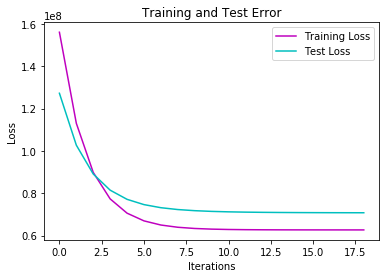


Calculated Parameter Values:

Intercept : 4.719332289803757
Coefficients : [[  7.92840864]
 [212.58070868]
 [156.84901549]
 [  7.14863506]
 [  6.3690255 ]
 [  2.95068951]]

Predict using test data...
R2 Score : 0.1171902637445209
Model Accuracy: 11.71902637445209%
Cost : 70772738.10627782
MSE : 141545476.21255565




In [545]:
# Multi variable linear regression using all features
learning_rate = 0.0001
epsilon = 0.5
single = 0 # multi variable
x = df[["yes", "age", "bmi", "children", "region", "male"]].values #all features 
y = df[["charges"]].values
theta, theta_0 = custom_linear_regr(x, y,  learning_rate, epsilon, single)  

For the multiple variable case, we observe a low accuracy value. Since we have seen that the *smoker* variable can provide strong predictive power, this suggests that better hyperparameter values and improved learning methods may aid in improving the accuracy of the multi variable model. These improvements are explored in the following sections.

## 2. Effects of Different Learning Rates

The learning rate $\alpha$ plays a pivotal role in the performance of the gradient descent algorithm. If $\alpha$ is too small, the gradient descent algorithm will converge very slowly as very small weight updates will be applied. In contrast, if $\alpha$ is too large, the gradient descent algorithm may diverge if the large step size overshoots the global minimum. We explore these effects below by applying a range of learning rates $\alpha = \{0.00001, 0.0001, 0.001, 0.01\}$ for the single variable *age*.

Normal Equation
Intercept : [3337.27583294]
Coefficients : [[247.90264149]]

Training model...


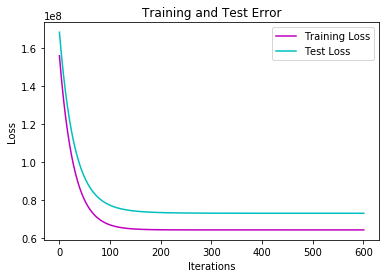

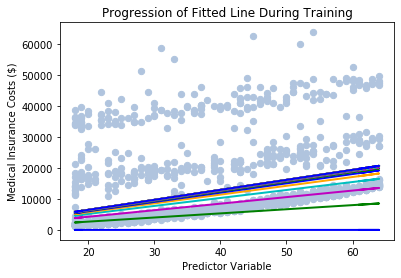

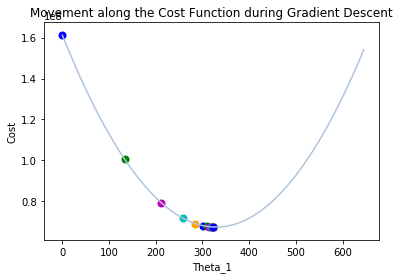


Calculated Parameter Values:

Intercept : 9.48420855582282
Coefficients : [[322.70762041]]

Predict using test data...
R2 Score : 0.08735730533637875
Model Accuracy: 8.735730533637875%
Cost : 73164374.79269505
MSE : 146328749.5853901




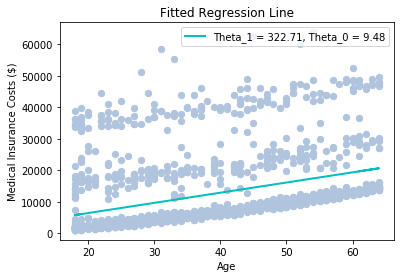

In [546]:
#----EFFECT OF DIFFERENT LEARNING RATES ON COVERGENCE---#

# Very small alpha
learning_rate = 0.00001
epsilon = 0.00005
single = 1 # single variable
x = df[["age"]].values
y = df[["charges"]].values
theta, theta_0 = custom_linear_regr(x, y,  learning_rate, epsilon, single)
variable_name = "Age"
plot_single_hypothesis(x, y, theta, theta_0, variable_name)

We observe that the model takes approximately 600 iterations to reach an accuracy of 8.7% with $\alpha = 0.00001$. A very small alpha causes the gradient descent algorithm to take much longer to converge.

Normal Equation
Intercept : [3337.27583294]
Coefficients : [[247.90264149]]

Training model...


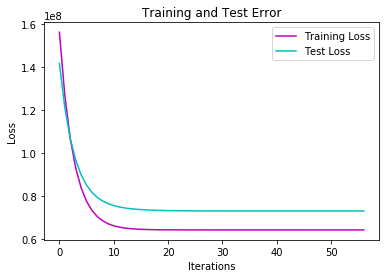

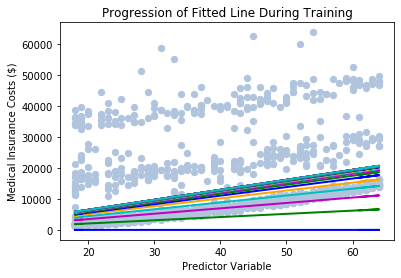

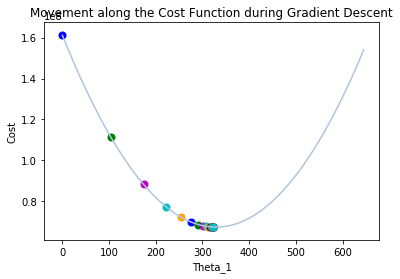


Calculated Parameter Values:

Intercept : 9.365858875673563
Coefficients : [[322.71242987]]

Predict using test data...
R2 Score : 0.08735768998500149
Model Accuracy: 8.735768998500149%
Cost : 73164343.95633799
MSE : 146328687.91267598




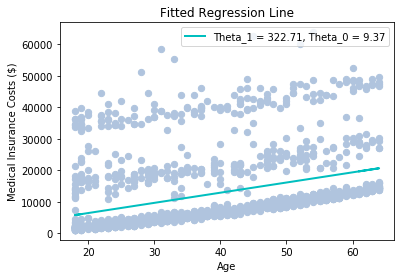

In [547]:
# Small alpha
learning_rate = 0.0001 # increase learning rate by factor 10
epsilon = 0.0005 # increase epsilon proportionally
single = 1 # single variable
x = df[["age"]].values
y = df[["charges"]].values
theta, theta_0 = custom_linear_regr(x, y,  learning_rate, epsilon, single)
variable_name = "Age"
plot_single_hypothesis(x, y, theta, theta_0, variable_name)

We observe that the model takes approximately 60 iterations to reach an accuracy of $8.7%$ with a slightly larger learning rate $\alpha = 0.0001$. Therefore the larger learning rate has increased the speed of convergence.

Normal Equation
Intercept : [3337.27583294]
Coefficients : [[247.90264149]]

Training model...


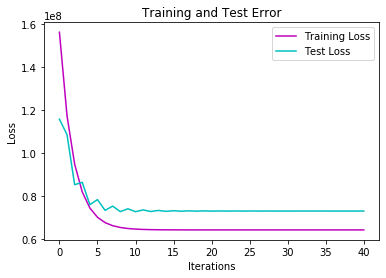

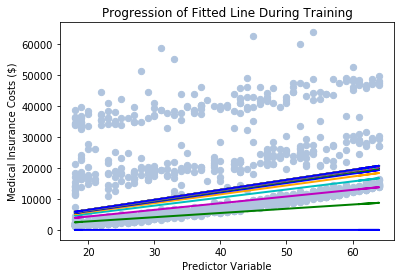

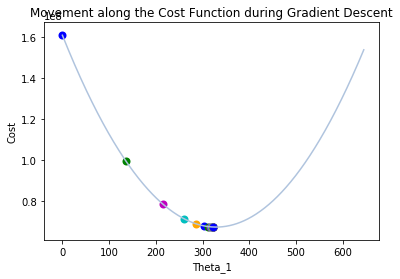


Calculated Parameter Values:

Intercept : 22.40346055854907
Coefficients : [[322.42866457]]

Predict using test data...
R2 Score : 0.08741680998198309
Model Accuracy: 8.741680998198309%
Cost : 73159604.44804826
MSE : 146319208.89609653




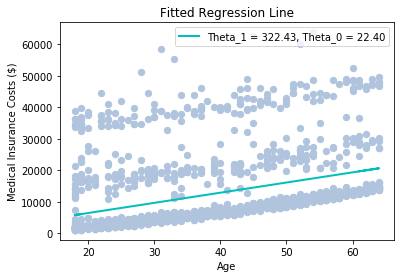

In [548]:
# Moderate alpha 
learning_rate = 0.001 # increase learning rate by factor 10
epsilon = 0.005 # increase epsilon proportionally
single = 1 # single variable
x = df[["age"]].values
y = df[["charges"]].values
theta, theta_0 = custom_linear_regr(x, y,  learning_rate, epsilon, single)
variable_name = "Age"
plot_single_hypothesis(x, y, theta, theta_0, variable_name)

We observe that the model takes approximately 40 iterations to reach an accuracy of $8.7%$ with a moderate learning rate $\alpha = 0.001$. Therefore the larger learning rate has increased the speed of convergence once again.


In [549]:
# Large alpha - uncomment the last line to see the effects of a learning rate that is too large

learning_rate = 0.01
epsilon = 0.05
single = 1 # single variable
x = df[["age"]].values
y = df[["charges"]].values
#theta, theta_0 = custom_linear_regr(x, y,  learning_rate, epsilon, single) # this line is left commented out to allow whole notebook to run


A learning rate that is too large causes the gradient descent algorithm to diverge as shown above.

## 3. Improved Learning

We now employ several improved learning techniques.

### Feature Scaling

Feature scaling ensure that different features have similar scales. This ensures that the contour lines are more even and therefore gradient descent converges much faster. Feature scaling was implemented according to the following equation:
$$
\begin{align}
x_j^{(i)} = \frac{x_j^{(i)} - x_{min_j}}{x_{max_j} - x_{min_j}}
\end{align}
$$

for each feature $j$ in order to scale the features to range between 0 and 1. A scaling factor was then utilised to investigate other scaling ranges. It should be noted that scaling is applied to both the training data and the test data.

In [550]:
#----FEATURE SCALING----#

# scale input features into range (0, scale_factor)
def scale(x_j, scale_factor): # takes in an array of input values for a single feature
    x_scaled = (x_j-min(x_j))/(max(x_j)-min(x_j))
    x_scaled = x_scaled * scale_factor
    return x_scaled

#### Single Variable Linear Regression

Scaling ensure that the ranges of the input variables are comparable and is therefore more applicable for multi variable linear regression. However single variable regression is shown below for completion.

Input Features x Before Scaling

[[19]
 [18]
 [28]
 [33]
 [32]]

Input Features x After Scaling

[[0.02173913]
 [0.        ]
 [0.2173913 ]
 [0.32608696]
 [0.30434783]]
Normal Equation
Intercept : [7799.52337978]
Coefficients : [[11403.52150858]]

Training model...


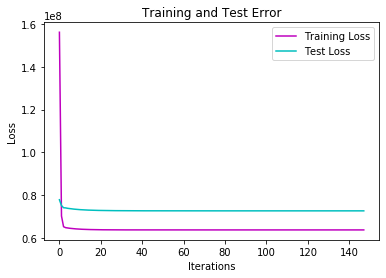

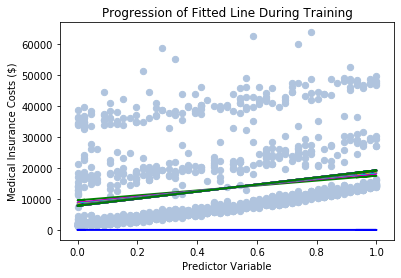

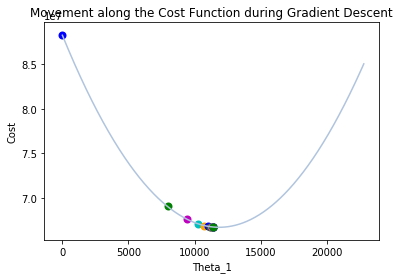


Calculated Parameter Values:

Intercept : 7799.553836789984
Coefficients : [[11403.46131652]]

Predict using test data...
R2 Score : 0.09329519093488059
Model Accuracy: 9.32951909348806%
Cost : 72688348.75321083
MSE : 145376697.50642166




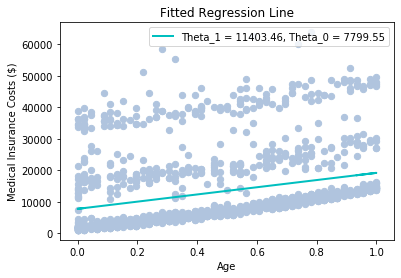

In [551]:
# Single variable linear regression using age variable scaled between 0 and 1
x = df[["age"]].values
print("Input Features x Before Scaling\n")
print(x[0:5])
x_scaled = scale(x, 1)
print("\nInput Features x After Scaling\n")
print(x_scaled[0:5])
y = df[["charges"]].values

learning_rate = 1 # requires a larger learning rate
epsilon = 0.005
single = 1
theta, theta_0 = custom_linear_regr(x_scaled, y,  learning_rate, epsilon, single) 
variable_name = "Age"
plot_single_hypothesis(x_scaled, y, theta, theta_0, variable_name)

It can be noted that by scaling the input variable *age* between 0 and 1 together with the use of a higher learning rate ($\alpha = 1$), the single variable model can attain a higher accuracy of 9.3%. Furthermore, the fitted parameter values match almost exactly with those calculated by the closed form equation.

#### Multiple Variable Linear Regression


Input Features x After Scaling

[[1.         0.02173913 0.3212268  0.         1.         0.        ]
 [0.         0.         0.47914985 0.2        0.66666667 1.        ]
 [0.         0.2173913  0.45843422 0.6        0.66666667 1.        ]
 [0.         0.32608696 0.18146355 0.         0.33333333 1.        ]
 [0.         0.30434783 0.34759214 0.         0.33333333 1.        ]]
Normal Equation
Intercept : [-1956.82617345]
Coefficients : [[23228.23169394]
 [11915.9018671 ]
 [12010.77904525]
 [ 2773.06418247]
 [ -839.91726162]
 [  -83.65060052]]

Training model...


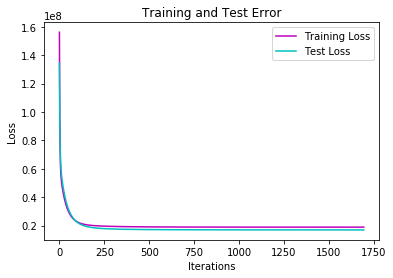


Calculated Parameter Values:

Intercept : -1874.3006981379062
Coefficients : [[23222.94631829]
 [11921.71280785]
 [11798.71814934]
 [ 2764.0049053 ]
 [ -831.0812967 ]
 [  -85.54827424]]

Predict using test data...
R2 Score : 0.7878873891006681
Model Accuracy: 78.78873891006681%
Cost : 17004559.016182974
MSE : 34009118.03236595




In [552]:
# Multiple variable linear regression with inputs scaled between 0 and 1
df["yes_scaled"] = scale(df[["yes"]].values, 1)
df["age_scaled"] = scale(df[["age"]].values, 1)
df["bmi_scaled"] = scale(df[["bmi"]].values, 1)
df["region_scaled"] = scale(df[["region"]].values, 1)
df["children_scaled"] = scale(df[["children"]].values, 1)
df["male_scaled"] = scale(df[["male"]].values, 1)
x_scaled = df[["yes_scaled", "age_scaled", "bmi_scaled", "children_scaled", "region_scaled", "male_scaled"]].values 
print("\nInput Features x After Scaling\n")
print(x_scaled[0:5])
y = df[["charges"]].values

learning_rate = 0.1
epsilon = 0.5
single = 0
theta, theta_0 = custom_linear_regr(x_scaled, y, learning_rate, epsilon, single) 

It can be observed that the input variables have been transformed to a comparable range from 0 to 1. This ensures that the contours are even, therefore allowing for a faster and smoother path of gradient descent.  This has improved the training of the multiple variable regression model such that the accuracy of the model has improved from 11.7% to 78.8%. In addition, it can be observed that the fitted parameter values are very close to those calculated using the normal equation. 

Scaling also allows for the use of a larger learning rate without divergence. Therefore scaling the input variables has resulted in the gradient descent algorithm converging much faster as the algorithm would have to train for significantly more iterations to achieve similar accuracy without the use of scaling.

Different scalings were then applied through the use of the *scale_factor* to investigate their effects.


Input Features x After Scaling

[[10.          0.2173913   3.21226796  0.         10.          0.        ]
 [ 0.          0.          4.79149852  2.          6.66666667 10.        ]
 [ 0.          2.17391304  4.58434221  6.          6.66666667 10.        ]
 [ 0.          3.26086957  1.81463546  0.          3.33333333 10.        ]
 [ 0.          3.04347826  3.47592144  0.          3.33333333 10.        ]]
Normal Equation
Intercept : [-1956.82617345]
Coefficients : [[2322.82316939]
 [1191.59018671]
 [1201.07790453]
 [ 277.30641825]
 [ -83.99172616]
 [  -8.36506005]]

Training model...


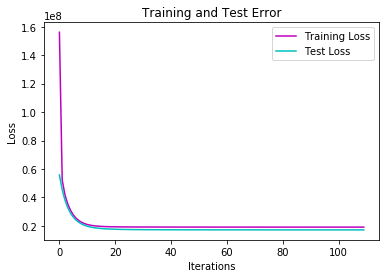


Calculated Parameter Values:

Intercept : -16.17408580691689
Coefficients : [[2298.17346375]
 [1120.86727406]
 [ 980.06994773]
 [ 227.30872997]
 [-133.83922983]
 [ -39.26464561]]

Predict using test data...
R2 Score : 0.7860610624682552
Model Accuracy: 78.60610624682552%
Cost : 17150971.239727907
MSE : 34301942.479455814




In [553]:
# Multiple variable linear regression with inputs scaled between 0 and 10
df["yes_scaled"] = scale(df[["yes"]].values, 10)
df["age_scaled"] = scale(df[["age"]].values, 10)
df["bmi_scaled"] = scale(df[["bmi"]].values, 10)
df["region_scaled"] = scale(df[["region"]].values, 10)
df["children_scaled"] = scale(df[["children"]].values, 10)
df["male_scaled"] = scale(df[["male"]].values, 10)
x_scaled = df[["yes_scaled", "age_scaled", "bmi_scaled", "children_scaled", "region_scaled", "male_scaled"]].values 
print("\nInput Features x After Scaling\n")
print(x_scaled[0:5])
y = df[["charges"]].values

learning_rate = 0.01
epsilon = 0.5
single = 0
theta, theta_0 = custom_linear_regr(x_scaled, y, learning_rate, epsilon, single) 

It can be observed that scaling to a range of 0 to 10 produces even better results as the same accuracy is obtained in fewer iterations (100 iterations).


Input Features x After Scaling

[[100.           2.17391304  32.12267958   0.         100.
    0.        ]
 [  0.           0.          47.9149852   20.          66.66666667
  100.        ]
 [  0.          21.73913043  45.84342211  60.          66.66666667
  100.        ]
 [  0.          32.60869565  18.14635459   0.          33.33333333
  100.        ]
 [  0.          30.43478261  34.75921442   0.          33.33333333
  100.        ]]
Normal Equation
Intercept : [-1956.82617345]
Coefficients : [[232.28231694]
 [119.15901867]
 [120.10779045]
 [ 27.73064182]
 [ -8.39917262]
 [ -0.83650601]]

Training model...


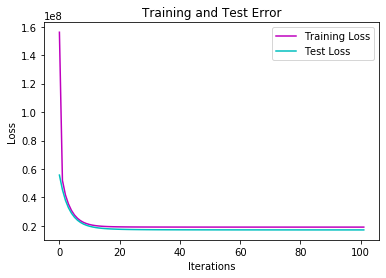


Calculated Parameter Values:

Intercept : 0.040278142798200245
Coefficients : [[229.79507672]
 [112.0505727 ]
 [ 97.83312213]
 [ 22.75288053]
 [-13.43452108]
 [ -3.96904941]]

Predict using test data...
R2 Score : 0.7860250706937719
Model Accuracy: 78.6025070693772%
Cost : 17153856.61391996
MSE : 34307713.22783992




In [554]:
# Multiple variable linear regression with inputs scaled between 0 and 10
df["yes_scaled"] = scale(df[["yes"]].values, 100)
df["age_scaled"] = scale(df[["age"]].values, 100)
df["bmi_scaled"] = scale(df[["bmi"]].values, 100)
df["region_scaled"] = scale(df[["region"]].values, 100)
df["children_scaled"] = scale(df[["children"]].values, 100)
df["male_scaled"] = scale(df[["male"]].values, 100)
x_scaled = df[["yes_scaled", "age_scaled", "bmi_scaled", "children_scaled", "region_scaled", "male_scaled"]].values 
print("\nInput Features x After Scaling\n")
print(x_scaled[0:5])
y = df[["charges"]].values

learning_rate = 0.0001
epsilon = 0.05
single = 0
theta, theta_0 = custom_linear_regr(x_scaled, y, learning_rate, epsilon, single) 



It can be observed that scaling to a range of 0 to 100 produces similar results to scaling between 0 and 10 as the same accuracy is obtained in 100 iterations.

### Feature Standardisation

Feature standardisation rescales features to have zero mean and unit variance. This is achieved using the following equation:
$$
\begin{align}
x_j^{(i)} = \frac{x_j^{(i)} - \mu_{j}}{s_j}
\end{align}
$$

where $\mu_{j}$ is the mean of the feature $j$ and $s_j$ is the standard deviation of feature $j$.

It should be noted that standardisation must also be applied to the test data as well as the training data.
It should also be noted that standardization is not applied to the bias term $x_0$.

In [555]:
#----FEATURE STANDARDISATION----#

def standardize(x_j): # takes in an array of input values for a single feature
    x_standard = (x_j-np.mean(x_j))/(np.std(x_j))
    return x_standard

Issues may occur if standardization is applied without first removing outliers from the data since the calculated mean and standard deviation can be skewed by outliers. We can therefore define a more robust standardization as follows:
$$
\begin{align}
x_j^{(i)} = \frac{x_j^{(i)} - M_{j}}{Q_3 - Q_1}
\end{align}
$$

where $M_{j}$ is the median of the feature and $Q_3 - Q_1$ is the interquartile range of the feature.

In [556]:
def robust_standardization(x_j): # takes in an array of input values for a single feature
    Q1 = np.percentile(x_j, 25, interpolation = 'midpoint') # first quartile (Q1)
    Q3 = np.percentile(x_j, 75, interpolation = 'midpoint') # third quartile (Q3)
    x_standard = (x_j-np.median(x_j))/(Q3-Q1)
    return x_standard

#### Single Variable Linear Regression

Input Features x Before Standardization

[[19]
 [18]
 [28]
 [33]
 [32]]
Input Features x After Standardization

[[-1.43876426]
 [-1.50996545]
 [-0.79795355]
 [-0.4419476 ]
 [-0.51314879]]
Normal Equation
Intercept : [13056.80099734]
Coefficients : [[3481.72046973]]

Training model...


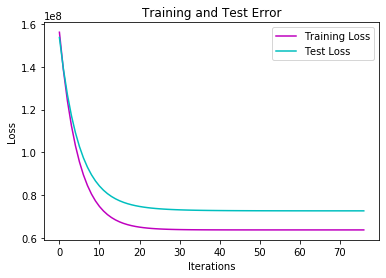

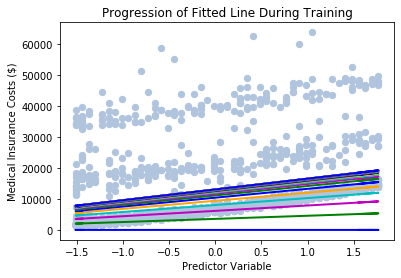

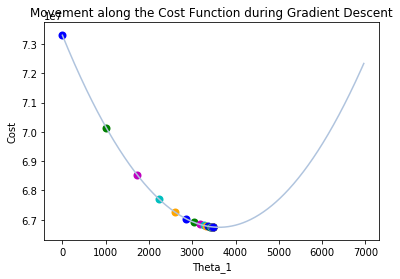


Calculated Parameter Values:

Intercept : 13053.025828882195
Coefficients : [[3481.40035321]]

Predict using test data...
R2 Score : 0.09326334426437055
Model Accuracy: 9.326334426437056%
Cost : 72690901.8243642
MSE : 145381803.6487284




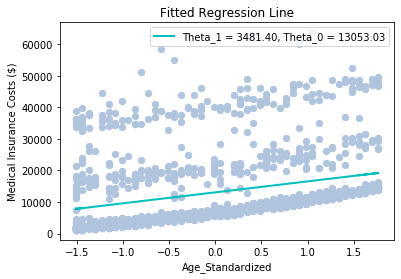

In [557]:
# Single variable linear regression using standardized age variable 
learning_rate = 0.1
epsilon = 0.05
single = 1
x = df[["age"]].values
print("Input Features x Before Standardization\n")
print(x[0:5])
x_standard = standardize(x)
print("Input Features x After Standardization\n")
print(x_standard[0:5])
y = df[["charges"]].values
theta, theta_0 = custom_linear_regr(x_standard, y,  learning_rate, epsilon, single) #had to adjust learning rate to 0.1 and epsilon to 0.0005 to get 4.9%, iterations 30
variable_name = "Age_Standardized"
plot_single_hypothesis(x_standard, y, theta, theta_0, variable_name)


As shown above, standardization helps improve convergence as the optimal parameter values very close to those of the normal form solution are obtained in only 80 iterations. This is even fewer iterations than for the scaled inputs.

#### Multiple Variable Linear Regression

Input Features x After Standardization

[[ 1.97058663 -1.43876426 -0.45332    -0.90861367  1.34390459 -1.0105187 ]
 [-0.5074631  -1.50996545  0.5096211  -0.07876719  0.43849455  0.98959079]
 [-0.5074631  -0.79795355  0.38330685  1.58092576  0.43849455  0.98959079]
 [-0.5074631  -0.4419476  -1.30553108 -0.90861367 -0.46691549  0.98959079]
 [-0.5074631  -0.51314879 -0.29255641 -0.90861367 -0.46691549  0.98959079]]
Normal Equation
Intercept : [13185.18614002]
Coefficients : [[9373.59383512]
 [3638.1603187 ]
 [1969.77669528]
 [ 668.33185738]
 [-309.22168657]
 [ -41.82301063]]

Training model...


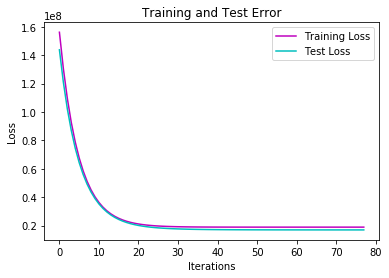


Calculated Parameter Values:

Intercept : 13181.437004232574
Coefficients : [[9369.27646085]
 [3637.26108883]
 [1968.71333069]
 [ 668.88165504]
 [-308.36065932]
 [ -40.37818453]]

Predict using test data...
R2 Score : 0.787908360179895
Model Accuracy: 78.79083601798949%
Cost : 17002877.815084968
MSE : 34005755.630169936




In [558]:
# Multiple variable linear regression using standardized input variables 
df["yes_standard"] = standardize(df[["yes"]].values)
df["age_standard"] = standardize(df[["age"]].values)
df["bmi_standard"] = standardize(df[["bmi"]].values)
df["region_standard"] = standardize(df[["region"]].values)
df["children_standard"] = standardize(df[["children"]].values)
df["male_standard"] = standardize(df[["male"]].values)
x_standard = df[["yes_standard", "age_standard", "bmi_standard", "children_standard", "region_standard", "male_standard"]].values 
print("Input Features x After Standardization\n")
print(x_standard[0:5])
y = df[["charges"]].values

learning_rate = 0.1
epsilon = 0.5
single = 0
theta, theta_0 = custom_linear_regr(x_standard, y, learning_rate, epsilon, single) 


In the multiple variable case, standardization allows us to obtain an accuracy of 78.7% with only 75 iterations.

### Regularization

Regularization reduces the complexity of the hypothesis function by minimizing the parameter values $\theta$. Regularization therefore aids in combatting overfitting. Ridge regression was implemented by adding a penalty term to the cost function as follows:

$$
\begin{align}
J(\theta) &= \frac{1}{2n} \sum_{i=1}^n (h_{\theta}(x^{(i)}) - y^{(i)})^2 + \lambda \sum_{j=1}^d \theta_{j}^2 
\end{align}
$$

where $\lambda$ is a hyperparameter controlling the amount of regularization applied. It should be noted that regularization is not performed on the bias term.

In [559]:
#----REGULARISATION----# 

# include a penalty term in the cost function
def regularized_cost(pred, true, lambda_1, theta):
    cost = (1/2)*np.mean((true - pred)**2) + lambda_1*(np.dot(np.transpose(theta), theta)) # no regularization on the bias term
    cost = cost[0][0] # return in value form
    return cost

Accordingly, the gradient equation is updated to include the penalty term as follows:

$$
\begin{align}
\frac{\partial J(\theta)}{\partial \theta_{j}} &= \frac{\lambda}{n} \theta_j + \frac{1}{n} \sum_{i=1}^n (h_{\theta}(x^{(i)}) - y^{(i)})(x_j^{(i)}) 
\end{align}
$$

The gradient for the bias term remains unchanged.

In [560]:
def regularized_gradient(pred, true, x, lambda_1, theta):
    grad =  ((lambda_1 * theta)/ pred.shape[0]) + (np.dot(np.transpose(x),(pred-true))/ pred.shape[0])
    return grad

Lastly, we can also modify the normal equation in order to directly compute the regularized weights.

$$
\begin{align}
\theta = (X^T X + \lambda I)^{-1} X^Ty
\end{align}
$$

where $I$ is the identity matrix.

In [561]:
def regularized_normal_eq(x_train, y_train, lambda_1):
    theta_all = np.dot(np.linalg.inv(np.dot(np.transpose(x_train), x_train) + (lambda_1*np.identity(x_train.shape[1]))), np.dot(np.transpose(x_train), y_train)) 
    return theta_all


In [562]:
def evaluate_regularized(x_test, y_test, theta, theta_0, lambda_1):
    y_pred = linear_pred(x_test, theta, theta_0)
    cost = regularized_cost(y_test, y_pred, lambda_1, theta)
    return cost

In [563]:
# batch gradient descent with regularization
def regularized_batch_grad_desc(x, y, x_train, y_train, x_test, y_test, lr, epsilon, single, lambda_1): 
    
    # init all variables
    theta = np.zeros((len(x_train[0]), 1)) # initialise weight matrix with shape (d x 1)
    theta_0 = 0 # initialise bias term
    MAX_LOOPS = 100 # for use if maximum iterations is used as stopping condition
    loops = 0 # loop counter
    theta_prev = np.ones((len(x_train[0]), 1))  # ensures while loop runs at least once
    
    losses = [] # track training losses
    test_losses = [] # track test losses
    thetas = [] # track parameter values
    theta_0s = [] # track bias values

    while(euclid(theta, theta_prev) > epsilon): 
        pred = linear_pred(x_train, theta, theta_0)
        loss = regularized_cost(pred, y_train, lambda_1, theta)
        losses.append(loss)
        grad = regularized_gradient(pred, y_train, x_train, lambda_1, theta) 
        grad_theta_0 = theta_0_gradient(pred, y_train, x_train)
        theta_prev = theta
        thetas.append(theta)
        theta_0s.append(theta_0)
        theta_0 = theta_0 - (lr*grad_theta_0) #update bias - no regularization applied here
        theta = theta - (lr*grad)
        test_loss = evaluate_regularized(x_test, y_test, theta, theta_0, lambda_1)
        test_losses.append(test_loss)
        loops += 1 
    
    # Visualise train and test error and gradient descent process
    plot_test_train_loss(losses, test_losses)
    if(single==1):
        visualisation(x, y, losses, test_losses, thetas, theta_0s)
    return [theta, theta_0]

In [564]:
def regularized_linear_regr(x, y, lr, epsilon, single, lambda_1):

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0) 

    print("Normal Equation: {}".format(regularized_normal_eq(x_train, y_train, lambda_1)))

    theta, theta_0 = regularized_batch_grad_desc(x, y, x_train, y_train, x_test, y_test, lr, epsilon, single, lambda_1) #what is the correct way to do this?
    print("Intercept : {}".format(theta_0))
    print("Coefficients : {}".format(theta))


    y_pred = linear_pred(x_test, theta, theta_0) #predict

    score = r2_score(y_test , y_pred)
    print("R2 Score : {}".format(score))
    print("Model Accuracy: {}%".format(score * 100))


    print("Cost : {}".format(regularized_cost(y_pred, y_test, lambda_1, theta)))
    print("MSE : {}".format(mean_squared_error(y_test, y_pred)))
    print("\n")
    
    return theta, theta_0

### Single Variable Linear Regression with Regularization

Normal Equation: [[322.92326023]]


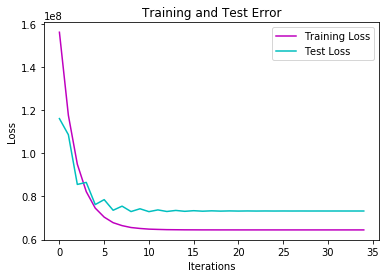

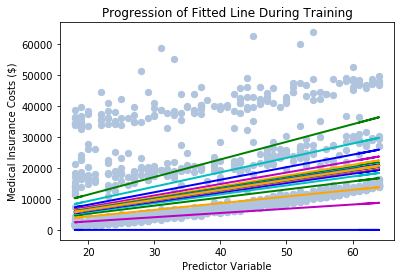

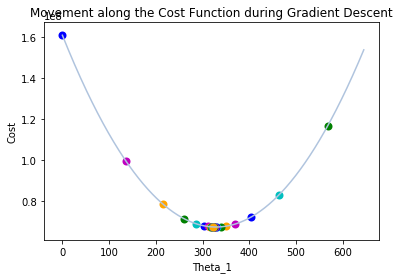

Intercept : 20.191762475043273
Coefficients : [[322.49545953]]
R2 Score : 0.08741449554508063
Model Accuracy: 8.741449554508062%
Cost : 73263793.3123202
MSE : 146319579.98180175




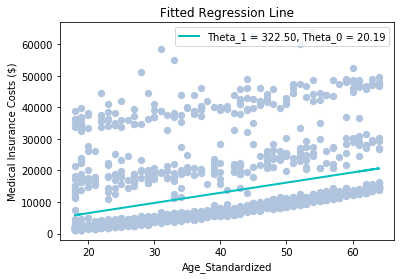

In [565]:
learning_rate = 0.001
epsilon = 0.05
single = 1
lambda_1 = 1 # penalty coefficient

x = df[["age"]].values
y = df[["charges"]].values
theta, theta_0 = regularized_linear_regr(x, y, learning_rate, epsilon, single, lambda_1)
variable_name = "Age_Standardized"
plot_single_hypothesis(x, y, theta, theta_0, variable_name)

### Multiple Variable Linear Regression with Regularization

It should be noted that regularization is traditionally applied together with standardization to ensure that the shrinking is applied fairly across the variables.

Normal Equation: [[9247.92735427]
 [3966.87634429]
 [1873.02021688]
 [ 591.98026275]
 [ 161.50513174]
 [-301.32003914]]


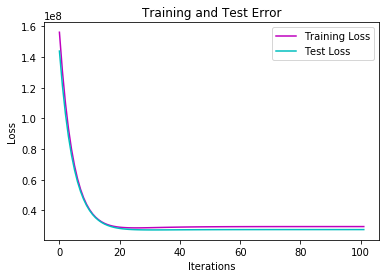

Intercept : 13184.876707196852
Coefficients : [[9372.07707162]
 [3637.66125478]
 [1969.44169876]
 [ 668.36353821]
 [-309.10052232]
 [ -41.56505114]]
R2 Score : 0.7879491451402402
Model Accuracy: 78.79491451402401%
Cost : 27548717.10782017
MSE : 33999216.36536882




In [566]:
# Moderate regularization with lambda = 0.1 (+ standardization)

learning_rate = 0.1
epsilon = 0.05
single = 0
lambda_1 = 0.1 # penalty coefficient

df["yes_standard"] = standardize(df[["yes"]].values)
df["age_standard"] = standardize(df[["age"]].values)
df["bmi_standard"] = standardize(df[["bmi"]].values)
df["region_standard"] = standardize(df[["region"]].values)
df["children_standard"] = standardize(df[["children"]].values)
df["male_standard"] = standardize(df[["male"]].values)
x_standard = df[["yes_standard", "age_standard", "bmi_standard", "children_standard", "region_standard", "male_standard"]].values
y = df[["charges"]].values
theta, theta_0  = regularized_linear_regr(x_standard, y,  learning_rate, epsilon, single, lambda_1)

We now plot different values of $\lambda$ representing the effects of weak or strong regularization.

Normal Equation: [[9249.02224117]
 [3967.35312173]
 [1873.19911948]
 [ 591.99820565]
 [ 161.54310357]
 [-301.42804717]]


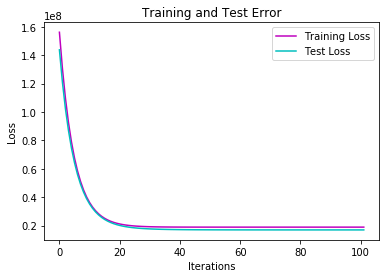

Intercept : 13184.879665092394
Coefficients : [[9373.18029804]
 [3638.09635874]
 [1969.64401357]
 [ 668.39398312]
 [-309.1196114 ]
 [ -41.64666866]]
R2 Score : 0.7879587926067644
Model Accuracy: 78.79587926067644%
Cost : 16998940.284235325
MSE : 33997669.53688775




In [567]:
# Weak regularization with lambda = 0.000001

learning_rate = 0.1
epsilon = 0.05
single = 0
lambda_1 = 0.000001 # penalty coefficient

df["yes_standard"] = standardize(df[["yes"]].values)
df["age_standard"] = standardize(df[["age"]].values)
df["bmi_standard"] = standardize(df[["bmi"]].values)
df["region_standard"] = standardize(df[["region"]].values)
df["children_standard"] = standardize(df[["children"]].values)
df["male_standard"] = standardize(df[["male"]].values)
x_standard = df[["yes_standard", "age_standard", "bmi_standard", "children_standard", "region_standard", "male_standard"]].values
y = df[["charges"]].values
theta, theta_0  = regularized_linear_regr(x_standard, y,  learning_rate, epsilon, single, lambda_1)

Normal Equation: [[9238.08498859]
 [3962.59053639]
 [1871.41153022]
 [ 591.81843225]
 [ 161.16405671]
 [-300.34981695]]


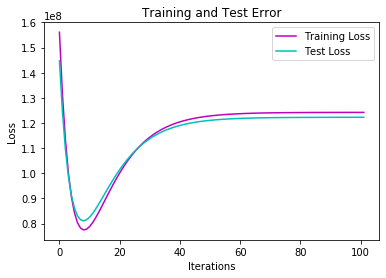

Intercept : 13184.850089840997
Coefficients : [[9362.15965182]
 [3633.75000772]
 [1967.62267662]
 [ 668.08936586]
 [-308.92869254]
 [ -40.83209843]]
R2 Score : 0.7878615523652361
Model Accuracy: 78.78615523652361%
Cost : 122275789.34562288
MSE : 34013260.570526004




In [568]:
# Strong regularization with lambda = 1

learning_rate = 0.1
epsilon = 0.05
single = 0
lambda_1 = 1 # penalty coefficient

df["yes_standard"] = standardize(df[["yes"]].values)
df["age_standard"] = standardize(df[["age"]].values)
df["bmi_standard"] = standardize(df[["bmi"]].values)
df["region_standard"] = standardize(df[["region"]].values)
df["children_standard"] = standardize(df[["children"]].values)
df["male_standard"] = standardize(df[["male"]].values)
x_standard = df[["yes_standard", "age_standard", "bmi_standard", "children_standard", "region_standard", "male_standard"]].values
y = df[["charges"]].values
theta, theta_0  = regularized_linear_regr(x_standard, y,  learning_rate, epsilon, single, lambda_1)

We observe that if the regularization parameter $\lambda$ is too high, the loss starts to increase.

Therefore through the application of several improved learning methods, our multiple variable linear regression model is able to predict insurance costs with 78.78% accuracy and trains in less than 100 iterations.

## 4. Additional Experimentation

As an additional exploration, we implement the stochastic gradient descent algorithm. 

In [569]:
#---STOCHASTIC GRADIENT DESCENT---#

from sklearn.utils import shuffle

def stochastic_grad_desc(x, y, x_train, y_train, x_test, y_test, lr, epsilon, single):
    
    # init all variables
    theta = np.zeros((len(x_train[0]), 1)) # initialise weight matrix with shape (d x 1)
    theta_0 = 0 # initialise bias term
    MAX_LOOPS = 40 # for use if maximum iterations is used as stopping condition
    loops = 0 # loop counter
    theta_prev = np.ones((len(x_train[0]), 1))  # ensures while loop runs at least once
    
    losses = [] # track training losses
    test_losses = [] # track test losses
    thetas = [] # track parameter values
    theta_0s = [] # track bias values
    
    # perform gradient descent until convergence
    while(loops < MAX_LOOPS): # alternative stopping condition

        n = x_train.shape[0] 
        for i in range(n): # iterate through each training example
            pred = linear_pred(x_train[i], theta, theta_0) # predict for all training samples
            loss = cost(pred, y_train[i]) # calculate cost based on current theta values
            losses.append(loss)
            theta_prev = theta # store previous theta for use in stopping condition
            thetas.append(theta) # store theta values for visualisation
            theta_0s.append(theta_0) # store bias values for visualisation
            grad = gradient(pred, y_train[i], x_train[i]) # calculate gradient wrt theta
            #print(grad)
            grad_theta_0 = theta_0_gradient(pred, y_train[i], x_train[i]) # calculate gradient wrt theta_0
            theta = theta - (lr*grad) # update parameters
            theta_0 = theta_0 - (lr*grad_theta_0) # update bias
            test_loss = evaluate(x_test, y_test, theta, theta_0) 
            test_losses.append(test_loss)
        loops += 1
        
    # Visualise training error and gradient descent process
    plt.plot(losses, label = "Training Loss", color = 'm')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    if(single==1):
        visualisation(x, y, losses, test_losses, thetas, theta_0s)
    return [theta, theta_0] # return fitted parameter values
    

In [570]:
def stochastic_linear_regr(x, y, lr, epsilon, single):

    # split data into train and test sets 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

    print("Normal Equation")
    print("Intercept : {}".format(normal_eq(x_train, y_train)[0]))
    print("Coefficients : {}".format(normal_eq(x_train, y_train)[1:]))
    
    
    # perform batch gradient descent
    print("\nTraining model...")
    theta, theta_0 = stochastic_grad_desc(x, y, x_train, y_train, x_test, y_test, lr, epsilon, single) # fit model using training data
    
    print("\nCalculated Parameter Values:\n")
    print("Intercept : {}".format(theta_0))
    print("Coefficients : {}".format(theta))

    print("\nPredict using test data...")
    y_pred = linear_pred(x_test, theta, theta_0) # predict on test data

    score = r2_score(y_test , y_pred)
    print("R2 Score : {}".format(score))
    print("Model Accuracy: {}%".format(score * 100))


    print("Cost : {}".format(cost(y_pred, y_test)))
    print("MSE : {}".format(mean_squared_error(y_test, y_pred)))
    print("\n")
    
    return theta, theta_0


Normal Equation
Intercept : [13056.80099734]
Coefficients : [[3481.72046973]]

Training model...


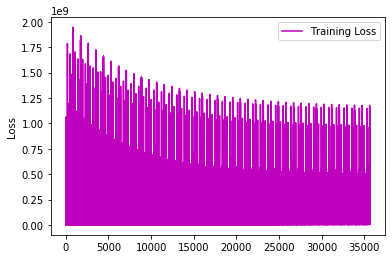

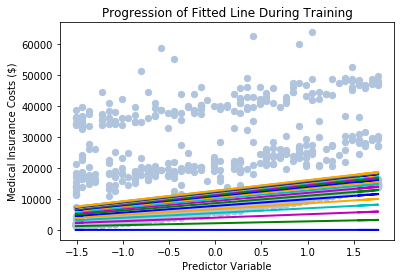

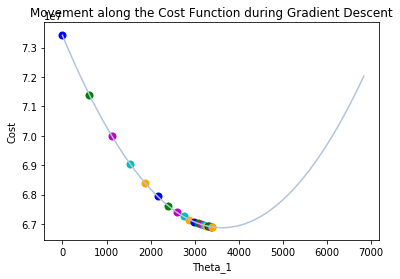


Calculated Parameter Values:

Intercept : 12718.732316348869
Coefficients : [[3415.97126623]]

Predict using test data...
R2 Score : 0.08952617797358309
Model Accuracy: 8.95261779735831%
Cost : 72990501.4779423
MSE : 145981002.9558846




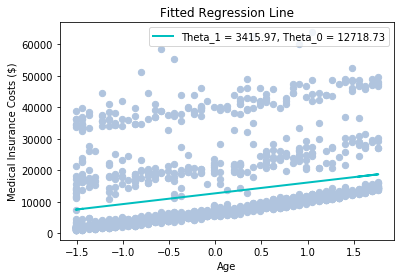

In [571]:
# much slower since no vectorised computation
# only produces good results when also standardised
learning_rate = 0.0001
epsilon = 0.05
x = df[["age"]].values
x_standard = standardize(x)
y = df[["charges"]].values
theta, theta_0 = stochastic_linear_regr(x_standard, y,  learning_rate, epsilon, 1)
variable_name = "Age"
plot_single_hypothesis(x_standard, y, theta, theta_0, variable_name)

It should be noted that the calculated parameter values are close to those computed by the normal equation. It can be observed that the training curve is much more uneven due to the stochastic nature of the algorithm.